# Descripción del dataset

[🔗 Dataset kaggle link](https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset/data)


In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

ModuleNotFoundError: No module named 'scipy'

## Importar el dataset  
Importar el dataset y dar un vistazo rápido a sus características

In [ ]:
# Import the dataset
dataset = pd.read_csv( "students_depression_dataset.csv" )
print("Dataset (rows, columns):", dataset.shape)
dataset.head(5)

Dataset (rows, columns): (508, 11)


,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [ ]:
dataset.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,508.000000,508.000000,508.000000,508.000000,508.000000
mean,26.210630,3.005906,3.074803,6.464567,2.925197
std,4.890611,1.388159,1.374003,3.786815,1.424744
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.000000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,14.000000,5.000000


## Retoques al dataset  
Retoques en cuanto a nombramiento de variables y algunas categorías para mejor estética, comprensión y facilidad de uso

In [ ]:
# Rename columns
dataset.columns = [ "gender" , "age" , "academic_pressure" , "study_satisfaction" , "sleep_duration" , "dietary_habits" , "bad_thoughts" , "study_hours" , "financial_stress" , "fam_metal_ill_history" , "depression" ]
dataset.head(5)

,gender,age,academic_pressure,study_satisfaction,sleep_duration,dietary_habits,bad_thoughts,study_hours,financial_stress,fam_metal_ill_history,depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [ ]:
# Show all sleep_duration values
dataset.loc[ :  , ["sleep_duration"] ].drop_duplicates()

,sleep_duration
0,7-8 hours
1,5-6 hours
3,More than 8 hours
9,Less than 5 hours


In [ ]:
# Convert values in sleep_duration column
dataset['sleep_duration'] = dataset['sleep_duration'].replace({
    "7-8 hours": "7-8",
    "5-6 hours": "5-6",
    "More than 8 hours": ">8",
    "Less than 5 hours": "<5"
})

dataset.head(5)

,gender,age,academic_pressure,study_satisfaction,sleep_duration,dietary_habits,bad_thoughts,study_hours,financial_stress,fam_metal_ill_history,depression
0,Male,28,2.0,4.0,7-8,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,>8,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,>8,Healthy,Yes,4,2,Yes,No


## Exploración y cruce de algunas variables

In [ ]:
# Check Atypical values function
def identify_atypical(dataset, column_name):
    dataset_copy = dataset.copy()
    coll = pd.Series(dataset_copy[column_name].tolist())

    Q1 = coll.quantile(.25)
    Q3 = coll.quantile(.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset_copy["atypical"] = 0

    dataset_copy.loc[
        (dataset_copy[column_name] > upper_bound)
        | (dataset_copy[column_name] < lower_bound),
        ["atypical"]
    ] = 1

    return dataset_copy.loc[dataset_copy["atypical"] == 1, :]

# Ejemplo de uso nada más
atypical_age = identify_atypical(dataset, "age")
print("Atypical age:", atypical_age.shape[0])

atypical_study_hours = identify_atypical(dataset, "study_hours")
print("Atypical study_hours:", atypical_study_hours.shape[0])


Atypical age: 0
Atypical study_hours: 0


### Ver distribuciones de variables principales

<Axes: title={'center': 'study_hours'}, xlabel='sleep_duration'>

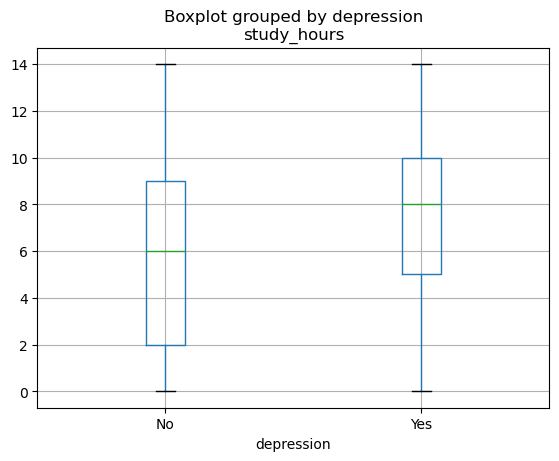

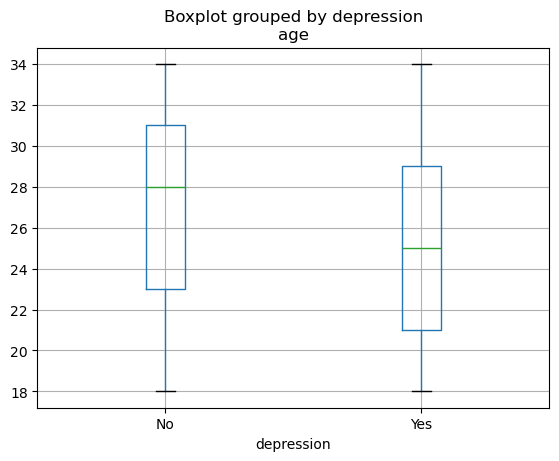

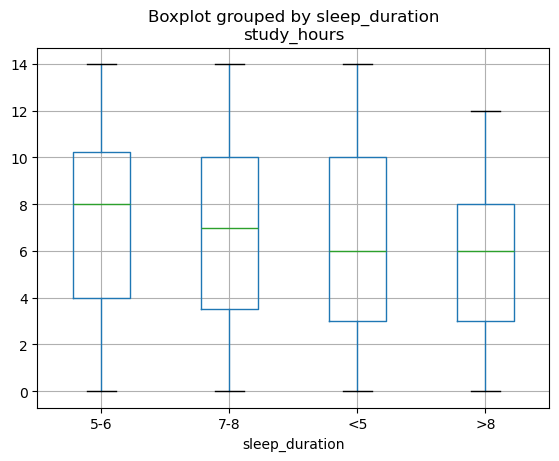

In [ ]:
dataset.boxplot( column='study_hours'  , by="depression" )
dataset.boxplot( column='age'  , by="depression" )
dataset.boxplot( column='study_hours'  , by="sleep_duration" )



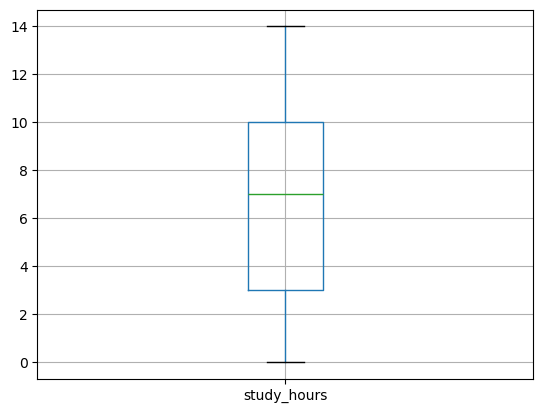

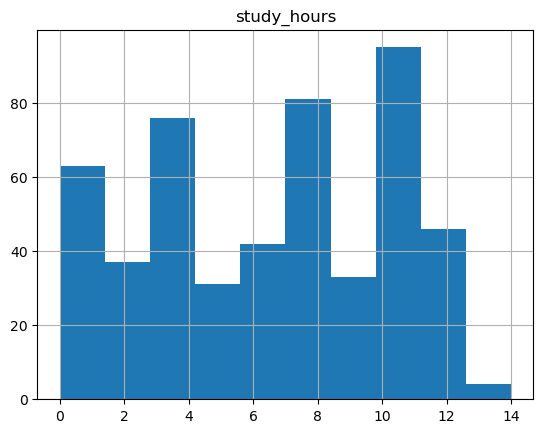

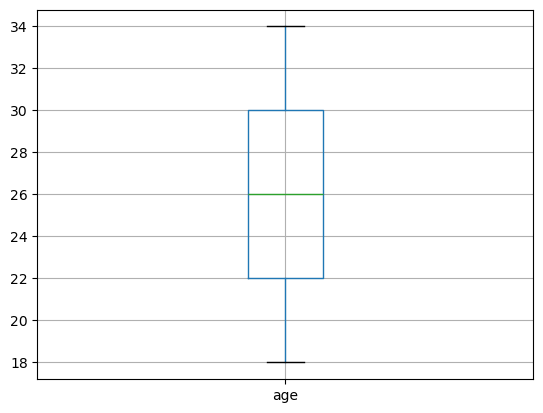

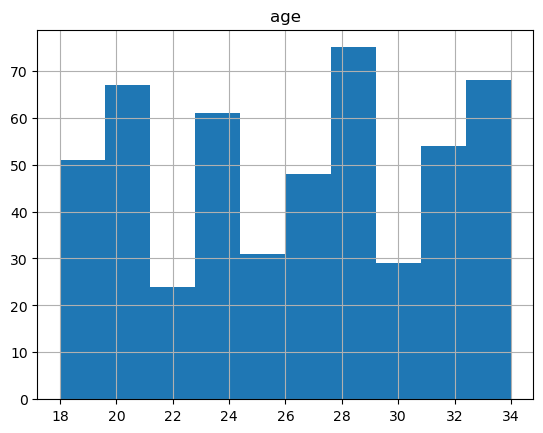

In [ ]:
dataset.boxplot( column="study_hours")
plt.show()
dataset["study_hours"].hist()
plt.title('study_hours')
plt.show()

dataset.boxplot( column="age")
plt.show()
dataset["age"].hist()
plt.title('age')
plt.show()

### Buscar patrones o relaciones entre variables

In [ ]:
gender_grouped = dataset.groupby(
    "gender" , as_index=False
).agg({
    "study_hours": ["mean", "median"]
})

gender_grouped.columns = ["gender", "study_hours_mean", "study_hours_median"]
gender_grouped

,gender,study_hours_mean,study_hours_median
0,Female,6.312236,6.0
1,Male,6.597786,7.0


In [ ]:
financial_stress_grouped = dataset.groupby(
    "financial_stress" , as_index=False
).agg({
    "study_hours": ["mean", "median"]
})

financial_stress_grouped.columns = ["financial_stress", "study_hours_mean", "study_hours_median"]
financial_stress_grouped

,financial_stress,study_hours_mean,study_hours_median
0,1,6.576577,7.0
1,2,6.428571,7.0
2,3,6.510000,7.0
3,4,5.736842,5.0
4,5,7.041237,8.0


In [ ]:
depression_grouped = dataset.groupby(
    ["depression", "bad_thoughts"] , as_index=False
).agg({
    "study_hours": ["mean", "median"]
})

depression_grouped.columns = ["depression", "bad_thoughts", "study_hours_mean", "study_hours_median"]
depression_grouped

,depression,bad_thoughts,study_hours_mean,study_hours_median
0,No,No,6.106145,6.0
1,No,Yes,4.837838,4.0
2,Yes,No,7.500000,8.0
3,Yes,Yes,7.083770,7.0


In [ ]:
dietary_habits_grouped = dataset.groupby(
    ["dietary_habits", "gender"], as_index=False
).size()

dietary_habits_grouped.rename(columns={"size": "total_people"}, inplace=True)

dietary_habits_grouped["percentage"] = (dietary_habits_grouped["total_people"] / dataset.shape[0]) * 100

depression_counts = dataset.groupby(
    ["dietary_habits", "gender"]
).agg(
    yes_dep=('depression', lambda x: (x == "Yes").sum()),
    no_dep=('depression', lambda x: (x == "No").sum())
).reset_index()

dietary_habits_grouped = dietary_habits_grouped.merge(depression_counts, on=["dietary_habits", "gender"])

dietary_habits_grouped["dep_percentage"] = (dietary_habits_grouped["yes_dep"] / dietary_habits_grouped["total_people"]) * 100


dietary_habits_grouped


,dietary_habits,gender,total_people,percentage,yes_dep,no_dep,dep_percentage
0,Healthy,Female,86,16.929134,37,49,43.023256
1,Healthy,Male,75,14.763780,27,48,36.000000
2,Moderate,Female,87,17.125984,38,49,43.678161
3,Moderate,Male,88,17.322835,44,44,50.000000
4,Unhealthy,Female,64,12.598425,39,25,60.937500
5,Unhealthy,Male,108,21.259843,70,38,64.814815


## Expansión del dataset

In [ ]:
dataset.dtypes

gender                    object
age                        int64
academic_pressure        float64
study_satisfaction       float64
sleep_duration            object
dietary_habits            object
bad_thoughts              object
study_hours                int64
financial_stress           int64
fam_metal_ill_history     object
depression                object
dtype: object

In [ ]:
# Asignar el tipo de variable que es a cada columna que necesitemos
num_cols = ["age", "study_hours"]
cat_cols = ["gender", "dietary_habits", "financial_stress", "depression"]

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['age', 'study_hours']
Categorical columns: ['gender', 'dietary_habits', 'financial_stress', 'depression']


In [ ]:
prob_freq = dataset.groupby( cat_cols , as_index=False ).size()

prob_freq.head(5)

,gender,dietary_habits,financial_stress,depression,size
0,Female,Healthy,1,No,7
1,Female,Healthy,1,Yes,4
2,Female,Healthy,2,No,12
3,Female,Healthy,2,Yes,4
4,Female,Healthy,3,No,9


In [ ]:
np.sum( prob_freq["size"] / dataset.shape[0] )

1.0

In [ ]:
prob_freq["size"] = prob_freq["size"] / dataset.shape[0]
prob_freq.head(5)

,gender,dietary_habits,financial_stress,depression,size
0,Female,Healthy,1,No,0.013780
1,Female,Healthy,1,Yes,0.007874
2,Female,Healthy,2,No,0.023622
3,Female,Healthy,2,Yes,0.007874
4,Female,Healthy,3,No,0.017717


In [ ]:
np.sum( prob_freq["size"])

1.0

### Revisión rápida de la data (manualmente)

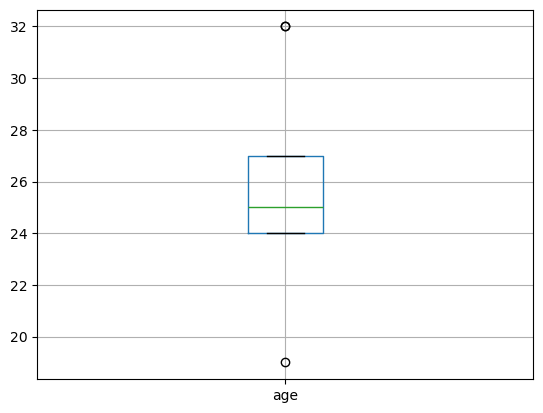

In [ ]:
dataset.loc[
    ( dataset["gender"] == "Male" )
    & ( dataset["dietary_habits"] == "Moderate" )
    & ( dataset["financial_stress"] == 3 )
    & ( dataset["depression"] == "Yes" ),
    ["age"]
].boxplot()

plt.show()

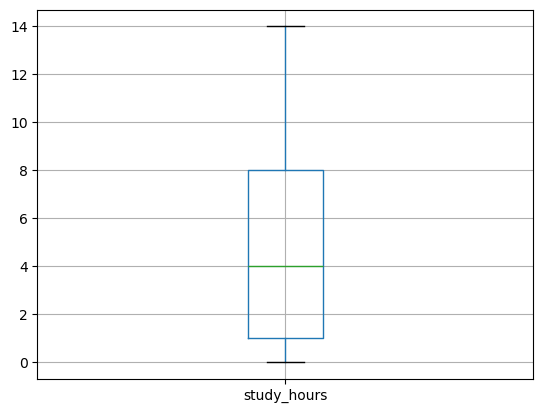

In [ ]:
dataset.loc[
    ( dataset["depression"] == "No" ) & ( dataset["bad_thoughts"] == "Yes" ),
    ["study_hours"]
].boxplot()

plt.show()

### Automatización de la limpieza de la data  
Automatizar la detección de valores atípicos.  
Calcular lower bound y upper bound y usarlos para ayudarnos a determinar si un valor es atípico.

In [ ]:
transformations = {}
new_cols = []
for c in num_cols:
    transformations[c] = [ 
        ( 'lower_bound' , lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))  ),
        ( 'upper_bound' , lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25))  )
    ]
    new_cols.append( f"{c}_lower_bound" )
    new_cols.append( f"{c}_upper_bound" )

transformations

{'age': [('lower_bound', <function __main__.<lambda>(x)>),
  ('upper_bound', <function __main__.<lambda>(x)>)],
 'study_hours': [('lower_bound', <function __main__.<lambda>(x)>),
  ('upper_bound', <function __main__.<lambda>(x)>)]}

In [ ]:
dataset_resultados = dataset.groupby( cat_cols , as_index=False ).agg(transformations)
dataset_resultados.head(5)

gender dietary_habits financial_stress depression         age              \
                                                     lower_bound upper_bound   
0  Female        Healthy                1         No       16.50       36.50   
1  Female        Healthy                1        Yes       17.25       41.25   
2  Female        Healthy                2         No       12.25       42.25   
3  Female        Healthy                2        Yes       13.75       27.75   
4  Female        Healthy                3         No       16.00       40.00   

  study_hours              
  lower_bound upper_bound  
0     -10.750      19.250  
1       7.375      12.375  
2      -2.875      10.125  
3       2.750      14.750  
4      -6.000      18.000

In [ ]:
dataset_resultados.columns =  cat_cols + new_cols
dataset_resultados.head(10)

,gender,dietary_habits,financial_stress,depression,age_lower_bound,age_upper_bound,study_hours_lower_bound,study_hours_upper_bound
0,Female,Healthy,1,No,16.500,36.500,-10.750,19.250
1,Female,Healthy,1,Yes,17.250,41.250,7.375,12.375
2,Female,Healthy,2,No,12.250,42.250,-2.875,10.125
3,Female,Healthy,2,Yes,13.750,27.750,2.750,14.750
4,Female,Healthy,3,No,16.000,40.000,-6.000,18.000
5,Female,Healthy,3,Yes,10.500,38.500,5.000,13.000
6,Female,Healthy,4,No,20.000,36.000,-7.500,20.500
7,Female,Healthy,4,Yes,6.750,42.750,-2.500,13.500
8,Female,Healthy,5,No,10.250,36.250,-6.500,17.500
9,Female,Healthy,5,Yes,16.875,35.875,-4.125,14.875


In [ ]:
dataset

,gender,age,academic_pressure,study_satisfaction,sleep_duration,dietary_habits,bad_thoughts,study_hours,financial_stress,fam_metal_ill_history,depression
0,Male,28,2.0,4.0,7-8,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,>8,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,>8,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
503,Male,22,2.0,4.0,5-6,Unhealthy,No,14,2,No,Yes
504,Female,25,2.0,4.0,7-8,Moderate,Yes,14,2,Yes,No
505,Male,21,5.0,1.0,<5,Unhealthy,Yes,14,5,Yes,Yes
506,Male,30,4.0,1.0,<5,Unhealthy,Yes,3,4,Yes,Yes


In [ ]:
df_bound = dataset.merge(
    dataset_resultados
    , on=cat_cols
    , how="inner"
)

#### Visualización del valor de columna contra su lower bound y upper bound

In [ ]:
df_bound.loc[
    ( df_bound["study_hours"] <= df_bound["study_hours_lower_bound"] )
    |
    ( df_bound["study_hours"] >= df_bound["study_hours_upper_bound"] )
    ,
    cat_cols + ["study_hours", "study_hours_lower_bound","study_hours_upper_bound"]
]

,gender,dietary_habits,financial_stress,depression,study_hours,study_hours_lower_bound,study_hours_upper_bound
48,Male,Healthy,4,No,12,-2.500,9.500
55,Male,Moderate,4,No,12,-2.750,9.250
86,Female,Healthy,3,Yes,3,5.000,13.000
152,Female,Unhealthy,4,No,3,3.000,3.000
200,Male,Moderate,2,Yes,2,5.000,13.000
259,Male,Moderate,3,No,4,4.125,11.125
297,Male,Unhealthy,5,No,6,6.500,10.500
372,Female,Healthy,2,No,11,-2.875,10.125
460,Female,Healthy,3,Yes,5,5.000,13.000
474,Male,Healthy,5,No,2,2.000,2.000


In [ ]:
df_bound.loc[
    ( df_bound["age"] <= df_bound["age_lower_bound"] )
    |
    ( df_bound["age"] >= df_bound["age_upper_bound"] )
    ,
    cat_cols + ["age", "age_lower_bound","age_upper_bound"]
]

,gender,dietary_habits,financial_stress,depression,age,age_lower_bound,age_upper_bound
6,Female,Moderate,2,Yes,34,27.000,33.000
32,Male,Moderate,3,Yes,32,19.500,31.500
33,Female,Moderate,2,Yes,21,27.000,33.000
84,Female,Unhealthy,4,Yes,34,18.500,30.500
85,Male,Unhealthy,3,Yes,18,21.500,33.500
99,Male,Unhealthy,2,Yes,30,14.375,29.375
143,Male,Moderate,3,Yes,19,19.500,31.500
152,Female,Unhealthy,4,No,28,28.000,28.000
306,Female,Unhealthy,1,No,21,22.875,35.875
357,Male,Unhealthy,4,No,32,12.000,32.000


In [ ]:
# Eliminar las filas que contienen valores atípicos
for c in num_cols:
    print( f" Row: { df_bound.shape[0] } " )
    print( f" {c}: processing... " )
    
    df_bound = df_bound.loc[ 
        ( df_bound[c] > df_bound[f"{c}_lower_bound"] )
        &
        ( df_bound[c] < df_bound[f"{c}_upper_bound"] )
        , :
    ]
print("Completed!")

 Row: 508 
 age: processing... 
 Row: 492 
 study_hours: processing... 
Completed!


In [ ]:
# El porcentaje de información que se eliminó
1 - 492/508

0.03149606299212604

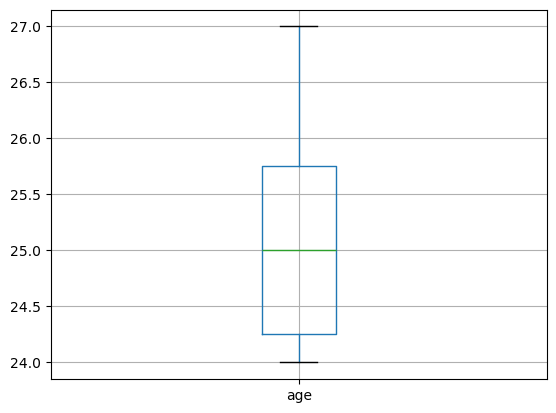

In [ ]:
# Verificar si se eliminaron los valores atípicos que habiamos ya visto anteriormente
df_bound.loc[
    ( df_bound["gender"] == "Male" )
    & ( df_bound["dietary_habits"] == "Moderate" )
    & ( df_bound["financial_stress"] == 3 )
    & ( df_bound["depression"] == "Yes" ),
    ["age"]
].boxplot()

plt.show()

In [ ]:
#Nuestro dataset ya limpio
df_clean = df_bound.loc[ : , cat_cols + num_cols ]

### Resumen estadístico de nuestro dataset limpio

In [ ]:
df_clean.groupby(
    cat_cols
    , as_index=False
).agg({
    'study_hours': [ "min" , "max" , "mean" , "std" ]
}).head(5)

gender dietary_habits financial_stress depression study_hours      \
                                                             min max   
0  Female        Healthy                1         No           0  10   
1  Female        Healthy                1        Yes          10  12   
2  Female        Healthy                2         No           0   9   
3  Female        Healthy                2        Yes           5  11   
4  Female        Healthy                3         No           0  12   

                        
        mean       std  
0   4.285714  4.309458  
1  10.666667  1.154701  
2   3.636364  2.460599  
3   8.500000  2.645751  
4   6.000000  4.031129

In [ ]:
summ_aggregations = {}
cols_summ = []
for c in num_cols:
    summ_aggregations[c] = [ "min" , "max" , "mean" , "std" ]
    cols_summ.append( f"{c}_min" )
    cols_summ.append( f"{c}_max" )
    cols_summ.append( f"{c}_mean" )
    cols_summ.append( f"{c}_std" )

summ_aggregations

{'age': ['min', 'max', 'mean', 'std'],
 'study_hours': ['min', 'max', 'mean', 'std']}

In [ ]:
df_summ = df_clean.groupby(
    cat_cols
    , as_index=False
).agg(summ_aggregations)

In [ ]:
df_summ.columns = cat_cols +  cols_summ
df_summ.head(5)

,gender,dietary_habits,financial_stress,depression,age_min,age_max,age_mean,age_std,study_hours_min,study_hours_max,study_hours_mean,study_hours_std
0,Female,Healthy,1,No,22,29,26.428571,3.047247,0,10,4.285714,4.309458
1,Female,Healthy,1,Yes,18,33,26.666667,7.767453,10,12,10.666667,1.154701
2,Female,Healthy,2,No,18,33,26.363636,5.025390,0,9,3.636364,2.460599
3,Female,Healthy,2,Yes,19,24,21.000000,2.449490,5,11,8.500000,2.645751
4,Female,Healthy,3,No,19,34,28.222222,5.044249,0,12,6.000000,4.031129


### Inicio de la expasión del dataset

In [ ]:
#Añadir una semilla para que los resultados sean reproducibles
np.random.seed(444)

In [ ]:
prob_freq.head(5)

,gender,dietary_habits,financial_stress,depression,size
0,Female,Healthy,1,No,0.013780
1,Female,Healthy,1,Yes,0.007874
2,Female,Healthy,2,No,0.023622
3,Female,Healthy,2,Yes,0.007874
4,Female,Healthy,3,No,0.017717


In [ ]:
num_ext = 100000 #Qué tanto vamos a extender nuestro dataset

#Notar que la columna size de prob_freq es la probabilidad
ids = np.random.choice( prob_freq.index , size=num_ext, p=prob_freq["size"].to_list() )

In [ ]:
len( ids[ ids == 0 ] )

1377

In [ ]:
#Debería tener similar probabilidad que en la columna size de prob_freq dataset en el elemento 0
#(Con la semilla 444 debería ser 0.01377)
len( ids[ ids == 0 ] ) / len( ids )

0.01377

In [ ]:
def trunc_vector(min_val, max_val, media, desv_std, size):
    # Calcular los límites 'a' y 'b' para la función truncnorm
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    # Generar muestras de la distribución normal truncada
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras